# Tutorial 2: Conditional Generative Adversarial Network (CGAN)
## Generating visible from infra-red satellite images

**Authors:** Paula Bigalke, Claudia Acquistapace, Daniele Corradini

**Affiliation:** Institute of Geophysics and Meteorology, University of Cologne, Germany

**Contact**: paula.bigalke@uni-koeln.de, cacquist@uni-koeln.de, dcorrad1@uni-koeln.de

## 2.1 - Dataset preparation and pre-processing (16 / y points)

A proper preparation and pre-processing of the dataset is a central task when it comes to machine learning. This includes normalization, data augmentation and loading everything into a structured dataset object so that the model has easy access. In this exercise, you will get to know some of these techniques and understand the structure of the datasets.

#### Installing packages

First, we start by installing some packages. If you run the notebook on your personal computer, you only need to install them once. In Google Collab, however, you need to install them again each time you open the notebook.

In [ ]:
# Install packages in Google Colab
# !pip install satpy matplotlib cartopy

#In Google Colab, you use a pre-configured environment that runs in the cloud,
#but you can still install packages during your session. However, note that these installations are temporary;
#they only last for the duration of your session.
#Once the session ends, you'll need to reinstall any packages when you start a new session.

#### Import Libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

#### Access permission to Google Drive & setting folder path

In [8]:
##### TODO ###########################################################################################################
##### give authorization to access your Google Drive in pop-up window that opens with this code

#drivedir='/content/drive'
#drive.mount(drivedir)
#os.chdir(drivedir)

##### TODO ###########################################################################################################
##### define path to tutorial directory

TUTORIAL_DIR = "/net/merisi/pbigalke/teaching/METFUT2024/CGAN_Pix2Pix_MSG/" ### /My Drive/.../ end path with /

# check if this path exists (if you have filled in the correct loaction). 
# If it gives you "False" then there was a mistake in the path
os.path.exists(TUTORIAL_DIR)

True

### Access to our own modules and methods

In [6]:
# add folder data_generation/ to sys.path
# this enables us to read in our own modules and methods from this folder
import sys
sys.path.append(f"{TUTORIAL_DIR}data_preprocessing/")

### (a) Train and test dataset (2 p)

We already prepared the splitting of the data into a training dataset and a test dataset. The TRAIN_PATH and TEST_PATH are defined below.

**Task a.1** (1 p): By evaluating the number of files in both folders - print out the fraction of training data in this example as well as the fraction of test data.

In [12]:
# path to training dataset
TRAIN_PATH = TUTORIAL_DIR + "VIS_IR_images/train/"

# path to test dataset
TEST_PATH = TUTORIAL_DIR + "VIS_IR_images/test/"

##### TODO ###########################################################################################################
##### fill in the argument for the glob() method that will return you the number of images in the folder

# ir_train = glob.glob(...)  # TODO
# ir_test = glob.glob(...)  # TODO

# <<<<<< Solution
ir_train = glob.glob(f"{TRAIN_PATH}*IR_108.png")
ir_test = glob.glob(f"{TEST_PATH}*IR_108.png")

##### TODO ###########################################################################################################
##### calculate and print the fraction of both train and test data

# frac_train = ...  # TODO
# frac_test = ...  # TODO

# print("The fraction of the training dataset is:", frac_train)
# print(...)  # TODO

# <<<<<< Solution
frac_train = len(ir_train) / (len(ir_train) + len(ir_test)) * 100
frac_test = len(ir_test) / (len(ir_train) + len(ir_test)) * 100

print(f"The fraction of the training dataset is {frac_train:.0f} % of all images.")
print(f"The fraction of the test dataset is {frac_test:.0f} % of all images.")

The fraction of the training dataset is 90 % of all images.
The fraction of the test dataset is 10 % of all images.


**Question a.2** (1 p): Explain briefly what the training and test datasets are used for. Why is it so important to split the data in such a way?

Answer: ... # TODO

*Solution: The training dataset is used to train the model. The test dataset is only to evaluate the model's performance e.g. after each epoch. It is important to have this unseen dataset for evaluation to identify if the model might overfit to the training data.*

### (b) Load and plot example images (4 p)

**Task b.1** (1 p): Load an example image pair (IR image and the corresponding VIS) from the training dataset using the provided method. Note: The image file names are structured in this way: yyyymmdd_hhmm_channelname.png. The image is loaded into a tensorflow tensor, each element is representing one pixel of the image.

In [35]:
# method to load in image with tensorflow
def load_single_image(image_file):
    """loads a single image from a file into a tf.tensor
    
    Parameters
    ----------
    image_file (str): image file path
    
    Returns
    -------
    image (tf.tensor): tensor containing the image
    """
    # read in image
    image = tf.io.read_file(image_file)
    image = tf.image.decode_png(image, channels=1)
    return image

##### TODO ###########################################################################################################
##### load an example IR image and its corresponding VIS image. 

# ir_img_file = TRAIN_PATH + "..."  # TODO
# vis_img_file = TRAIN_PATH + "..."  # TODO

# ir_img_tensor = _load_single_image(...)  # TODO
# vis_img_tensor = ...   # TODO

# <<<<<< Solution
ir_img_file = TRAIN_PATH + "20230701_1012_IR_108.png"
vis_img_file = TRAIN_PATH + "20230701_1012_VIS006.png"

ir_img_tensor = load_single_image(ir_img_file)
vis_img_tensor = load_single_image(vis_img_file)

**Task b.2** (1 p): To get a feeling of the image-tensor's size and the value range of the pixels print their shape and minimum and maximum values.

In [36]:
##### TODO ###########################################################################################################
##### print their shapes with img_tensor.shape and minimum and maximum values with np.min(img_tensor) and np.max(img_tensor)

# shape_ir_img_tensor = ...  # TODO
# min_ir_img_tensor = ...    # TODO
# max_ir_img_tensor = ...    # TODO
# print(f"IR image tensor: shape = {shape_ir_img_tensor}, min = {min_ir_img_tensor} and max = {max_ir_img_tensor}.")

# same for vis_img_tensor
# ... # TODO

# <<<<<< Solution
print(f"IR image tensor: shape = {ir_img_tensor.shape}, min = {np.min(ir_img_tensor)} and max = {np.max(ir_img_tensor)}.")
print(f"VIS image tensor: shape = {vis_img_tensor.shape}, min = {np.min(vis_img_tensor)} and max = {np.max(vis_img_tensor)}.")
##########

IR image tensor: shape = (128, 128, 1), min = 24 and max = 218.
VIS image tensor: shape = (128, 128, 1), min = 0 and max = 255.


**Question b.3** (1 p): Would you generally expect the model to have more or less trainable parameters (weights) if the images were larger?

Answer: ...  # TODO

*Solution: More!*

**Task b.4** (1 p): For comparison - plot both images next to each other using the provided plotting method. Be careful to provide the correct minimum and maximum values (vmin, vmax) for properly adjusting the color range.

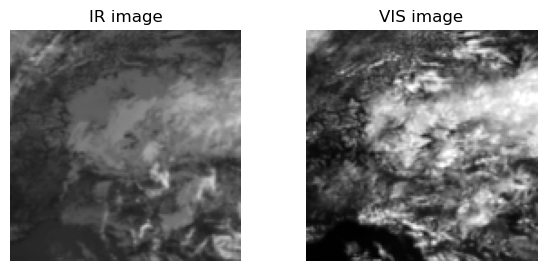

In [37]:
# plotting method for example image pair
def plot_image_pair(ir_img_tensor, vis_img_tensor, vmin, vmax):
    """plots an IR and VIS image pair next to each other
    
    Parameters
    ----------
    ir_image_tensor (tf.tensor): IR image
    vis_image_tensor (tf.tensor): VIS image
    vmin (int): minimum value of color range 
    vmax (int): maximum value of color range
    """
    fig, axes = plt.subplots(1,2, figsize = (7,3))
    # plot IR image
    axes[0].imshow(ir_img_tensor, cmap="gray", vmin=vmin, vmax=vmax)
    axes[0].set_title("IR image")
    axes[0].set_axis_off()
    # plot VIS image
    axes[1].imshow(vis_img_tensor, cmap="gray", vmin=vmin, vmax=vmax)
    axes[1].set_title("VIS image")
    axes[1].set_axis_off()
    # show and close image
    plt.show()
    plt.close()


##### TODO ###########################################################################################################
##### plot the example image pair giving the correct value range: vmin and vmax.

# plot_image_pair(...)  # TODO

# <<<<<< Solution
# value range of image is greyscale 0 .. 255
vmin = 0
vmax = 255
plot_image_pair(ir_img_tensor, vis_img_tensor, vmin, vmax)

### (c) Normalization (3 p)

**Task c.1** (1 p): Normalize the two example image-tensors using the provided method and print their minimum and maximum values again.

In [38]:
def normalize(ir_img_tensor, vis_img_tensor):
    """normalize the image pair
    
    Parameters
    ----------
    ir_image_tensor (tf.tensor): IR image
    vis_image_tensor (tf.tensor): VIS image

    Returns
    -------
    ir_image_norm (tf.tensor): normalized IR image
    vis_image_norm (tf.tensor): normalized VIS image
    """
    ir_img_norm = (tf.cast(ir_img_tensor, tf.float32) / 127.5) - 1.0
    vis_img_norm = (tf.cast(vis_img_tensor, tf.float32) / 127.5) - 1.0
    return ir_img_norm, vis_img_norm

##### TODO ###########################################################################################################
##### normalize the example image pair and print the new minimum and maximum values.

# ir_img_norm, vis_img_norm = normalize(...)  # TODO

# <<<<<< Solution
ir_img_norm, vis_img_norm = normalize(ir_img_tensor, vis_img_tensor)

print(f"IR image tensor: min = {np.min(ir_img_norm)} and max = {np.max(ir_img_norm)}.")
print(f"VIS image tensor: min = {np.min(vis_img_norm)} and max = {np.max(vis_img_norm)}.")


IR image tensor: min = -0.8117647171020508 and max = 0.7098039388656616.
VIS image tensor: min = -1.0 and max = 1.0.


**Question c.2** (1 p): To which range are they normalized? If you would plot the normalized images - which values for vmin and vmax do you insert so that the images look the same as before?

Answer: ...  # TODO

*Solution: The images are normalized to -1 to 1. For plotting - vmin = -1, vmax = 1.*

**Question c.3** (1 p): Why is it important to normalize the images?

Answer: ... # TODO

*Solution: The input images should all be on a smiliar scale to improve the performance and training stability. Large input values will blow up the gradients. (???)*

### (d) Data augmentation (3 p)

A common trick to improve the learning of the network is to perturb and vary the training images randomly in space and appearance. This so called "data augmentation" artificially increases the variability in the dataset. In this way, the network doesn't focus too strongly on specifics of the training images and gets a broader view.

Here, we focus only on one example: random horizontal flip. This method randomly flips the training images in the horizontal direction. Important is that either both images are flipped or both are not. The corresponding pair should be processed in the same way!

**Task d.1** (1 p): Apply the random flip on the example images and plot them again (you can run the cell several times until you see the images changing).


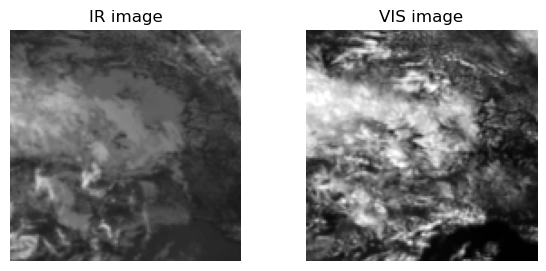

In [43]:
def random_flip(ir_img_norm, vis_img_norm):
    """randomly flips both images horizontally
    
    Parameters
    ----------
    ir_image_norm (tf.tensor): normalized IR image
    vis_image_norm (tf.tensor): normalized VIS image

    Returns
    -------
    ir_image_flip (tf.tensor): normalized IR image either flipped or not flipped
    vis_image_flip (tf.tensor): normalized VIS image flipped or not flipped
    """
    if tf.random.uniform(()) > 0.5:
        ir_img_flip = tf.image.flip_left_right(ir_img_norm)
        vis_img_flip = tf.image.flip_left_right(vis_img_norm)
    else:
        ir_img_flip = ir_img_norm
        vis_img_flip = vis_img_norm

    return ir_img_flip, vis_img_flip

##### TODO ###########################################################################################################
##### apply random_flip to the normalized images

# ir_img_flip, vis_img_flip = ...  # TODO

# <<<<<< Solution
ir_img_flip, vis_img_flip = random_flip(ir_img_norm, vis_img_norm)

##### TODO ###########################################################################################################
##### plot the image pair again. NOTE: careful that you provide the correct vmin and vmax !!!

# ...  # TODO

# <<<<<< Solution
plot_image_pair(ir_img_flip, vis_img_flip, vmin=-1, vmax=1)

**Question d.2** (1 p): How high is the probability of each image pair to be flipped?

Answer: ...  # TODO

*Solution: The probability for each image pair to be flipped is 0.5.*

**Question d.3** (1 p): Can you think of other data augmentation techniques?

Answer: Yes, of course we learned about it in the lecture! Other possible techniques are ...  # TODO

*Solution: One method could be for example to randomly crop out a smaller square from an image and then resize to its original size. Another way is to blurr the images or perturb its colors. Vertical flip and rotation are possible as well.*

### (e) Loading in the complete datasets (4 p)

Now we want to prepare the whole training dataset in such a way that the model can work with it. The loading pipeline is already prepared for you in the following methods (which are also defined in the python file data_processing/load_datasets.py.)

**Task e.1** (1 p): Load in the dataset from the training folder TRAIN_PATH (defined above) and investigate the structure by varying the batch size.

In [52]:
# some useful methods that we load from data_processing.load_datasets.py
from data_processing.load_datasets import _resize, _get_paired_IR_VIS_file_lists

#
def _preprocess_train_images(ir_image_file, vis_image_file):
    """defines the loading and preprocessing chain of image pairs

    Parameters
    ----------
    ir_image_file (str): file path of IR image
    vis_image_file (str): file path of VIS image

    Returns
    -------
    ir_image, vis_image: the preprocessed images
    """
    # load images as tf.tensor
    ir_image = load_single_image(ir_image_file)
    vis_image = load_single_image(vis_image_file)

    # do some preprocessing
    ir_image, vis_image = _resize(ir_image, vis_image)  # ensure that all images are in the correct size
    ir_image, vis_image = random_flip(ir_image, vis_image)
    ir_image, vis_image = normalize(ir_image, vis_image)

    return ir_image, vis_image

#
def load_train_dataset(train_path, batch_size):
    """automatically loads, preprocesses and structures the whole dataset from given folder path

    Parameters
    ----------
    train_path (str): path to training dataset
    batch_size (int): size of mini batches to sort the dataset in

    Returns
    -------
    train_dataset (tf.data.Dataset): structured and preprocessed dataset
    """
    # get all ir and vis images from path, sorted into paired lists
    train_ir_images, train_vis_images = _get_paired_IR_VIS_file_lists(train_path)

    # create tensorflow dataset object from list of images 
    train_dataset = tf.data.Dataset.from_tensor_slices((train_ir_images, train_vis_images))

    # preprocess images. The map function of tensorflow calls _preprocess_train_images on each element
    train_dataset = train_dataset.map(_preprocess_train_images)

    # organize dataset into batches after shuffling
    train_dataset = train_dataset.shuffle(100).batch(batch_size)

    return train_dataset


##### TODO ###########################################################################################################
##### vary the batch size and investigate the structure of the dataset

BATCH_SIZE = 100  # 20, 100  # TODO


##### TODO ###########################################################################################################
##### load in dataset from TRAIN_PATH

#train_dataset = load_train_dataset(...)  # TODO

# <<<<<< Solution
train_dataset = load_train_dataset(TRAIN_PATH, BATCH_SIZE)

# printing some info on the dataset structure
print(train_dataset)
print("Batch size: ", BATCH_SIZE)
print("Number of batches in dataset: ", len(train_dataset))
print("Shape of batches:")
for batch in train_dataset:
    # print shapes of content
    print(batch[0].shape, batch[1].shape)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None))>
Batch size:  100
Number of batches in dataset:  5
Shape of batches:
(100, 128, 128, 1) (100, 128, 128, 1)
(100, 128, 128, 1) (100, 128, 128, 1)
(100, 128, 128, 1) (100, 128, 128, 1)
(100, 128, 128, 1) (100, 128, 128, 1)
(75, 128, 128, 1) (75, 128, 128, 1)


**Question e.2** (1 p): How is the dataset structured? Why is the last batch smaller?

Answer: ...  # TODO

*Solution: The dataset is sorted into batches of the given size. The last batch takes the rest.*

**Question e.3** (1 p):  What is contained in each batch? 

Answer: ...  # TODO

*Solution: Each batch contains two lists - one with the IR images and one with the corresponding VIS images. *

**Question e.4** (1 p): What is the role of the batch during training?

Answer: ...  # TODO

*Solution: The batch defines how many images are given to the network in one training step. 